In [ ]:
TASK-2: UNEMPLOYMENT ANALYSIS WITH PYTHON

Author: M.Abhishek

Domain: Data Science

ID:OIB/J1/IP1227

Aim=Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project. 

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
#reading the dataset and storing
dataframe = pd.read_csv('unemployement.csv')
dataframe.head()

,Region,States,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Frequency,Date,longitude,latitude
0,South,Andhra Pradesh,5.48,16635535,41.02,M,31-01-2020,15.9129,79.74
1,South,Andhra Pradesh,5.83,16545652,40.90,M,29-02-2020,15.9129,79.74
2,South,Andhra Pradesh,5.79,15881197,39.18,M,31-03-2020,15.9129,79.74
3,South,Andhra Pradesh,20.51,11336911,33.10,M,30-04-2020,15.9129,79.74
4,South,Andhra Pradesh,17.43,12988845,36.46,M,31-05-2020,15.9129,79.74


In [5]:

dataframe.shape

(267, 9)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   States                                   267 non-null    object 
 2   Estimated Unemployment Rate (%)          267 non-null    float64
 3   Estimated Employed                       267 non-null    int64  
 4   Estimated Labour Participation Rate (%)  267 non-null    float64
 5   Frequency                                267 non-null    object 
 6   Date                                     267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [11]:
dataframe.isnull().sum()

Region                                     0
States                                     0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Frequency                                  0
Date                                       0
longitude                                  0
latitude                                   0
dtype: int64

In [13]:
print("First few rows of the dataset:")
print(dataframe.head())

First few rows of the dataset:
  Region          States  Estimated Unemployment Rate (%)  Estimated Employed  \
0  South  Andhra Pradesh                             5.48            16635535   
1  South  Andhra Pradesh                             5.83            16545652   
2  South  Andhra Pradesh                             5.79            15881197   
3  South  Andhra Pradesh                            20.51            11336911   
4  South  Andhra Pradesh                            17.43            12988845   

   Estimated Labour Participation Rate (%) Frequency         Date  longitude  \
0                                    41.02         M   31-01-2020    15.9129   
1                                    40.90         M   29-02-2020    15.9129   
2                                    39.18         M   31-03-2020    15.9129   
3                                    33.10         M   30-04-2020    15.9129   
4                                    36.46         M   31-05-2020    15.9129   

 

In [15]:
print("First few rows of the dataset:")
print(dataframe.head())

First few rows of the dataset:
  Region          States  Estimated Unemployment Rate (%)  Estimated Employed  \
0  South  Andhra Pradesh                             5.48            16635535   
1  South  Andhra Pradesh                             5.83            16545652   
2  South  Andhra Pradesh                             5.79            15881197   
3  South  Andhra Pradesh                            20.51            11336911   
4  South  Andhra Pradesh                            17.43            12988845   

   Estimated Labour Participation Rate (%) Frequency         Date  longitude  \
0                                    41.02         M   31-01-2020    15.9129   
1                                    40.90         M   29-02-2020    15.9129   
2                                    39.18         M   31-03-2020    15.9129   
3                                    33.10         M   30-04-2020    15.9129   
4                                    36.46         M   31-05-2020    15.9129   

 

In [17]:
print("\nData types of each column:")
print(dataframe.dtypes)


Data types of each column:
Region                                      object
States                                      object
Estimated Unemployment Rate (%)            float64
Estimated Employed                           int64
Estimated Labour Participation Rate (%)    float64
Frequency                                   object
Date                                        object
longitude                                  float64
latitude                                   float64
dtype: object


In [19]:
quantitative_cols = []
qualitative_cols = []

for column in dataframe.columns:
    if pd.api.types.is_numeric_dtype(dataframe[column]):
        quantitative_cols.append(column)
    else:
        qualitative_cols.append(column)

print("\nQuantitative columns:")
print(quantitative_cols)

print("\nQualitative columns:")
print(qualitative_cols)


Quantitative columns:
['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'longitude', 'latitude']

Qualitative columns:
['Region', 'States', 'Frequency', 'Date']


In [21]:
def get_measurement_scale(data):
    scale_dict = {}
    for column in data.columns:
        unique_values = data[column].nunique()
        total_values = data[column].count()
        if pd.api.types.is_numeric_dtype(data[column]):
            if unique_values == total_values:  # Ratio scale
                scale_dict[column] = "Ratio"
            else:  # Interval scale
                scale_dict[column] = "Interval"
        else:
            if unique_values == total_values:  # Nominal scale
                scale_dict[column] = "Nominal"
            else:  # Ordinal scale
                scale_dict[column] = "Ordinal"
    return scale_dict

# Get the measurement scale of each column
measurement_scale = get_measurement_scale(dataframe)

# Display the measurement scale of each column
print("\nMeasurement scale of each column:")
for column, scale in measurement_scale.items():
    print("\n"f"{column}: {scale}")


Measurement scale of each column:

Region: Ordinal

States: Ordinal

Estimated Unemployment Rate (%): Interval

Estimated Employed: Ratio

Estimated Labour Participation Rate (%): Interval

Frequency: Ordinal

Date: Ordinal

longitude: Interval

latitude: Interval


In [23]:
dataframe.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']
dataframe.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,South,Andhra Pradesh,5.48,16635535,41.02,M,31-01-2020,15.9129,79.74
1,South,Andhra Pradesh,5.83,16545652,40.90,M,29-02-2020,15.9129,79.74
2,South,Andhra Pradesh,5.79,15881197,39.18,M,31-03-2020,15.9129,79.74


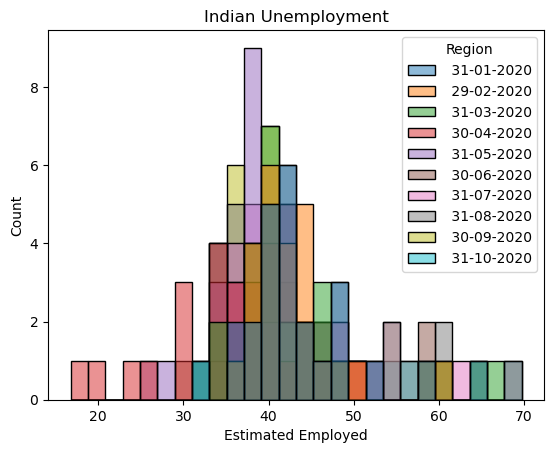

In [74]:
dataframe.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=dataframe)
plt.show()

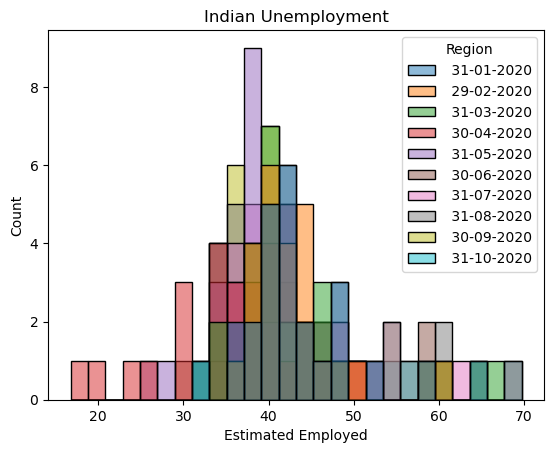

In [80]:
dataframe.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=dataframe)
plt.show()

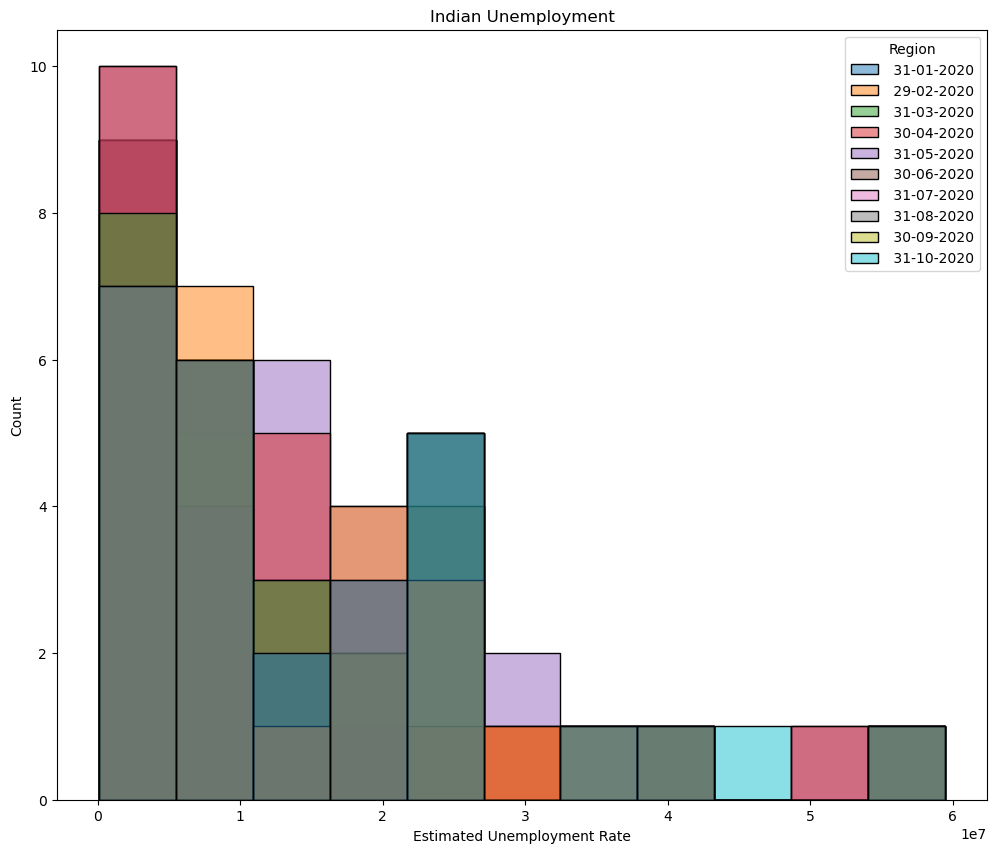

In [84]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=dataframe)
plt.show()

In [88]:
print(dataframe.isnull().sum())

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
dtype: int64


In [ ]:

Summary
So this is how you can analyze the unemployment rate by using the Python programming language. Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force.